In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
df = pd.read_csv("Medical_insurance.csv")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## DATA CLEANING

In [18]:
df.shape

(2772, 7)

In [20]:
df.duplicated().sum()

1435

In [26]:
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [30]:
df.shape

(1337, 7)

In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [45]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

## EDA

C:\Users\Aditya Dubey\AppData\Local\Temp\ipykernel_10508\3774217891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="mako")
C:\Users\Aditya Dubey\AppData\Local\Temp\ipykernel_10508\3774217891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="mako")
C:\Users\Aditya Dubey\AppData\Local\Temp\ipykernel_10508\3774217891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],palette="mako")


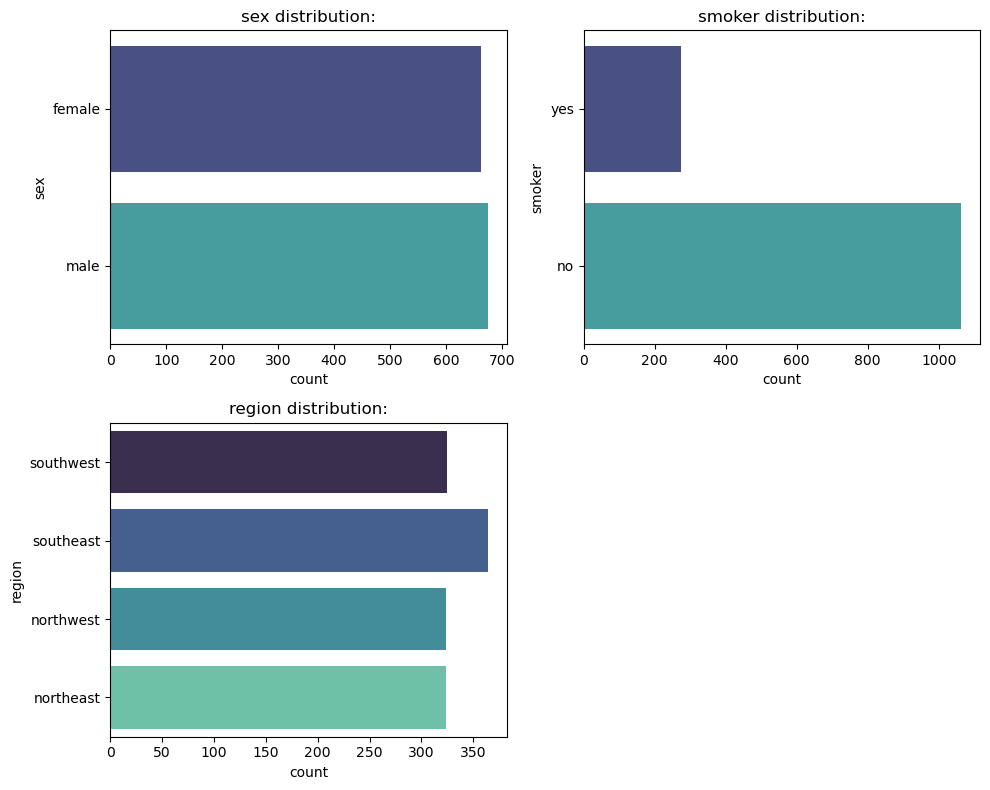

In [57]:
features = ['sex','smoker','region']
plt.figure(figsize=(10,8))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.countplot(df[col],palette="mako")
    plt.title(f'{col} distribution:')
plt.tight_layout()
plt.show()

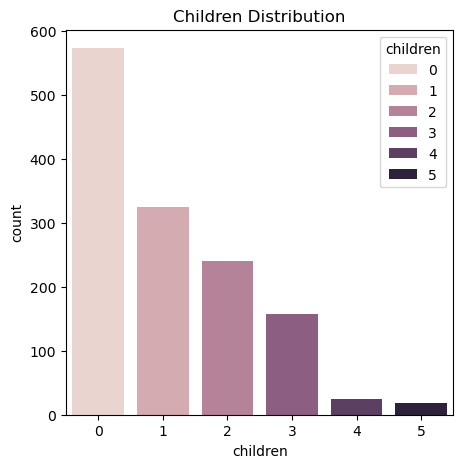

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=df,hue='children')
plt.title('Children Distribution')
plt.show()    

<Figure size 1000x800 with 0 Axes>

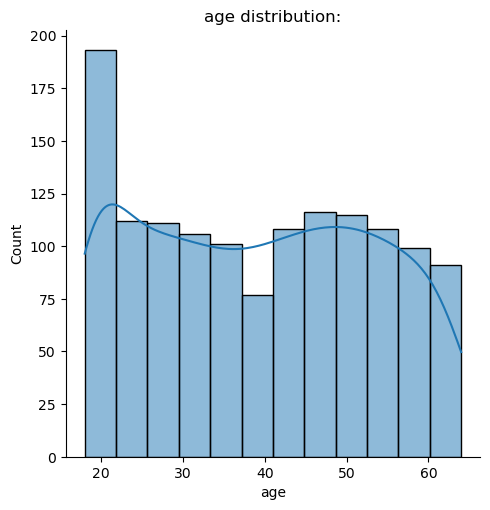

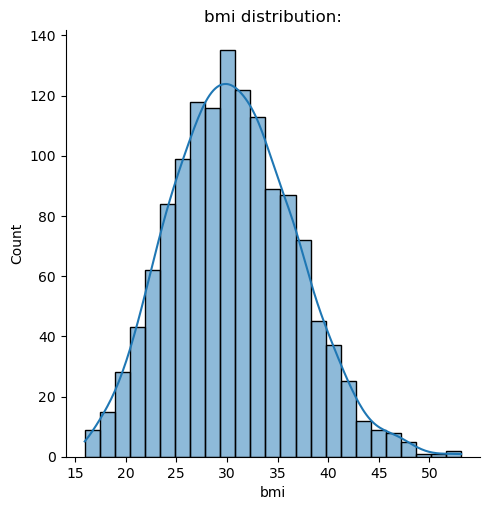

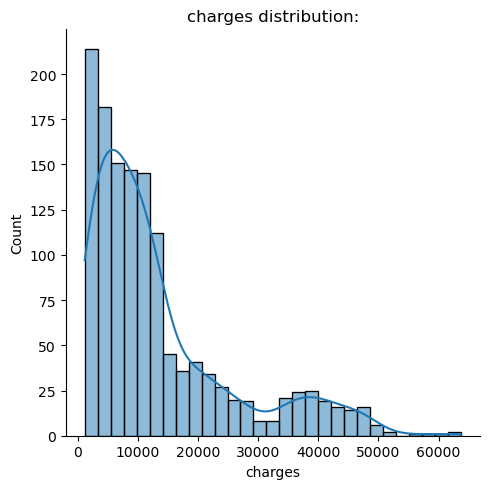

In [79]:
col = ['age','bmi','charges']
plt.figure(figsize=(10,8))
for i,col in enumerate(col):
    sns.displot(df[col],kde=True)
    plt.title(f'{col} distribution:')
plt.tight_layout()
plt.show()

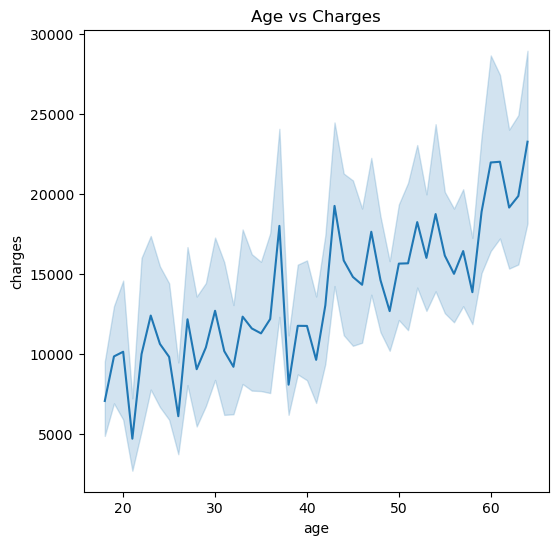

In [85]:
## Age vs Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='charges',data=df)
plt.title("Age vs Charges")
plt.show()

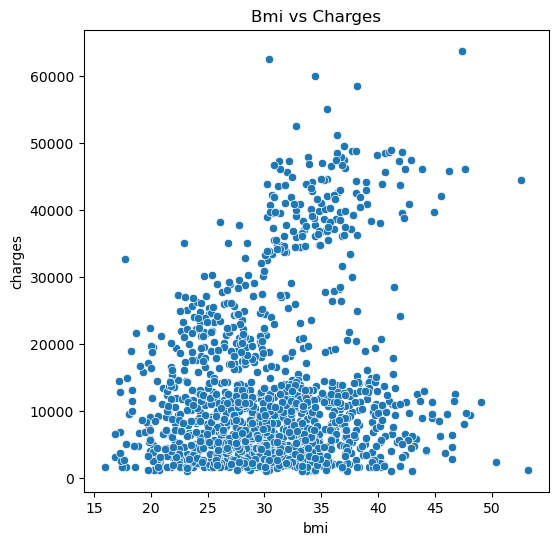

In [95]:
## Bmi vs Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title("Bmi vs Charges")
plt.show()

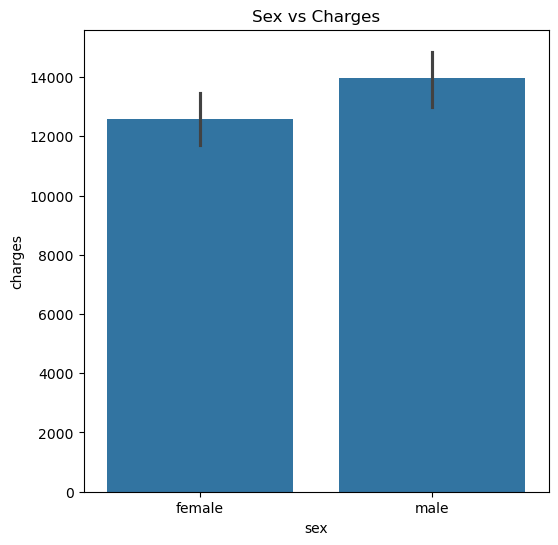

In [97]:
# Sex vs Charges
plt.figure(figsize=(6,6))
sns.barplot(x='sex',y='charges',data=df)
plt.title("Sex vs Charges")
plt.show()

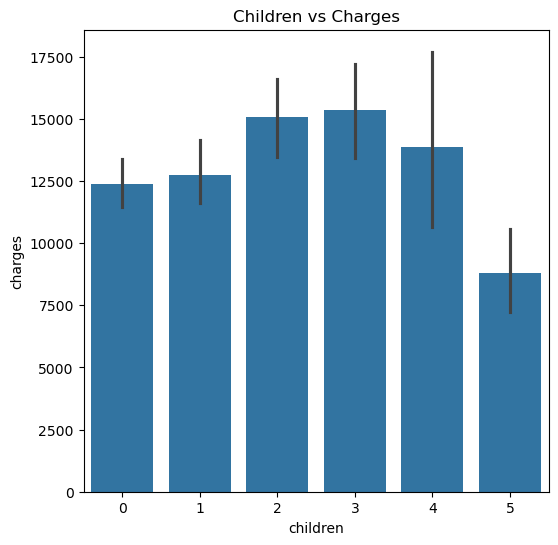

In [93]:
# Children vs Charges
plt.figure(figsize=(6,6))
sns.barplot(x='children',y='charges',data=df)
plt.title("Children vs Charges")
plt.show()

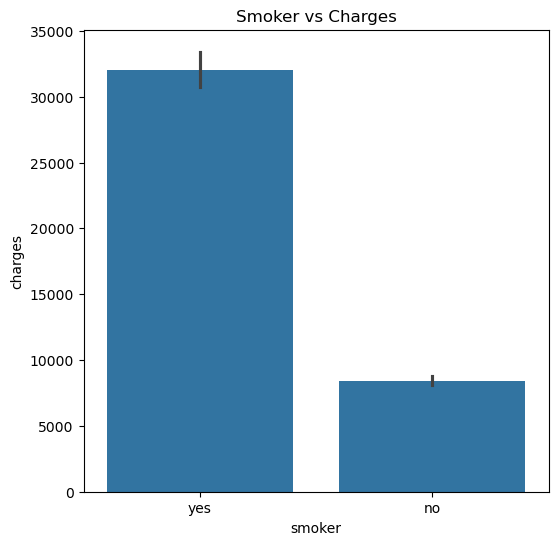

In [99]:
# Smoker vs Charges
plt.figure(figsize=(6,6))
sns.barplot(x='smoker',y='charges',data=df)
plt.title("Smoker vs Charges")
plt.show()

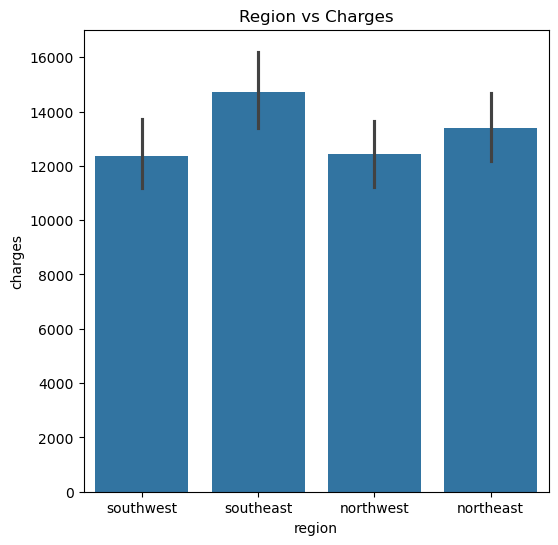

In [101]:
# Region vs Charges
plt.figure(figsize=(6,6))
sns.barplot(x='region',y='charges',data=df)
plt.title("Region vs Charges")
plt.show()

## DATA PREPROCESSING

Encoding the Categorical Values

In [122]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df['sex'] = ohe.fit_transform(df[['sex']])
df['region'] = ohe.fit_transform(df[['region']])
df['smoker'] = ohe.fit_transform(df[['smoker']])

In [125]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,0.0,0.0,16884.92400
1,18,1.0,33.770,1,1.0,0.0,1725.55230
2,28,1.0,33.000,3,1.0,0.0,4449.46200
3,33,1.0,22.705,0,1.0,0.0,21984.47061
4,32,1.0,28.880,0,1.0,0.0,3866.85520


In [127]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['charges']),df['charges'],test_size=0.2,random_state=42)

In [137]:
print(X_train.shape)
print(X_train)
print(Y_train)
print(Y_train.shape)

(1069, 6)
      age  sex     bmi  children  smoker  region
1114   23  1.0  24.510         0     1.0     1.0
968    21  1.0  25.745         2     1.0     1.0
599    52  0.0  37.525         2     1.0     0.0
170    63  1.0  41.470         0     1.0     0.0
275    47  0.0  26.600         2     1.0     1.0
...   ...  ...     ...       ...     ...     ...
1096   51  0.0  34.960         2     0.0     1.0
1131   27  1.0  45.900         2     1.0     0.0
1295   20  1.0  22.000         1     1.0     0.0
861    38  0.0  28.000         3     1.0     0.0
1127   35  0.0  35.860         2     1.0     0.0

[1069 rows x 6 columns]
1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64
(1069,)


In [153]:
reg = [LinearRegression(),SVR(),RandomForestRegressor()]
y_pred = []
for i in  range(len(reg)):
    reg[i].fit(X_train,Y_train)
    y_pred.append(reg[i].predict(X_test))
    print(f"R2 Score for model {reg[i]}: {r2_score(Y_test, y_pred[i])}")

R2 Score for model LinearRegression(): 0.8059819718216691
R2 Score for model SVR(): -0.13444423316426568
R2 Score for model RandomForestRegressor(): 0.8809811262887106


In [157]:
input_data= (31,1,25.74,0,1,0)
#changing input_data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
#reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)       #reshape(1,-1) since we are predicting on the basis of a single sample or row
reg = [LinearRegression(),SVR(),RandomForestRegressor()]
prediction = []
for i in range(len(reg)):
    reg[i].fit(X_train,Y_train)
    prediction.append(reg[i].predict(input_data_reshaped))
    print(f"The insurance cost is USD using {reg[i]}:",prediction[i])

C:\Users\Aditya Dubey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Aditya Dubey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


The insurance cost is USD using LinearRegression(): [4103.85873821]
The insurance cost is USD using SVR(): [9171.53753631]
The insurance cost is USD using RandomForestRegressor(): [3589.6978765]


C:\Users\Aditya Dubey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
